## **Import Libraries**

In [1]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
url = "https://raw.githubusercontent.com/WiraDKP/supervised_learning/master/05%20-%20SVM/data/creditcard.csv"
data = pd.read_csv(url)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **CEK MISSING VALUES**

<Axes: >

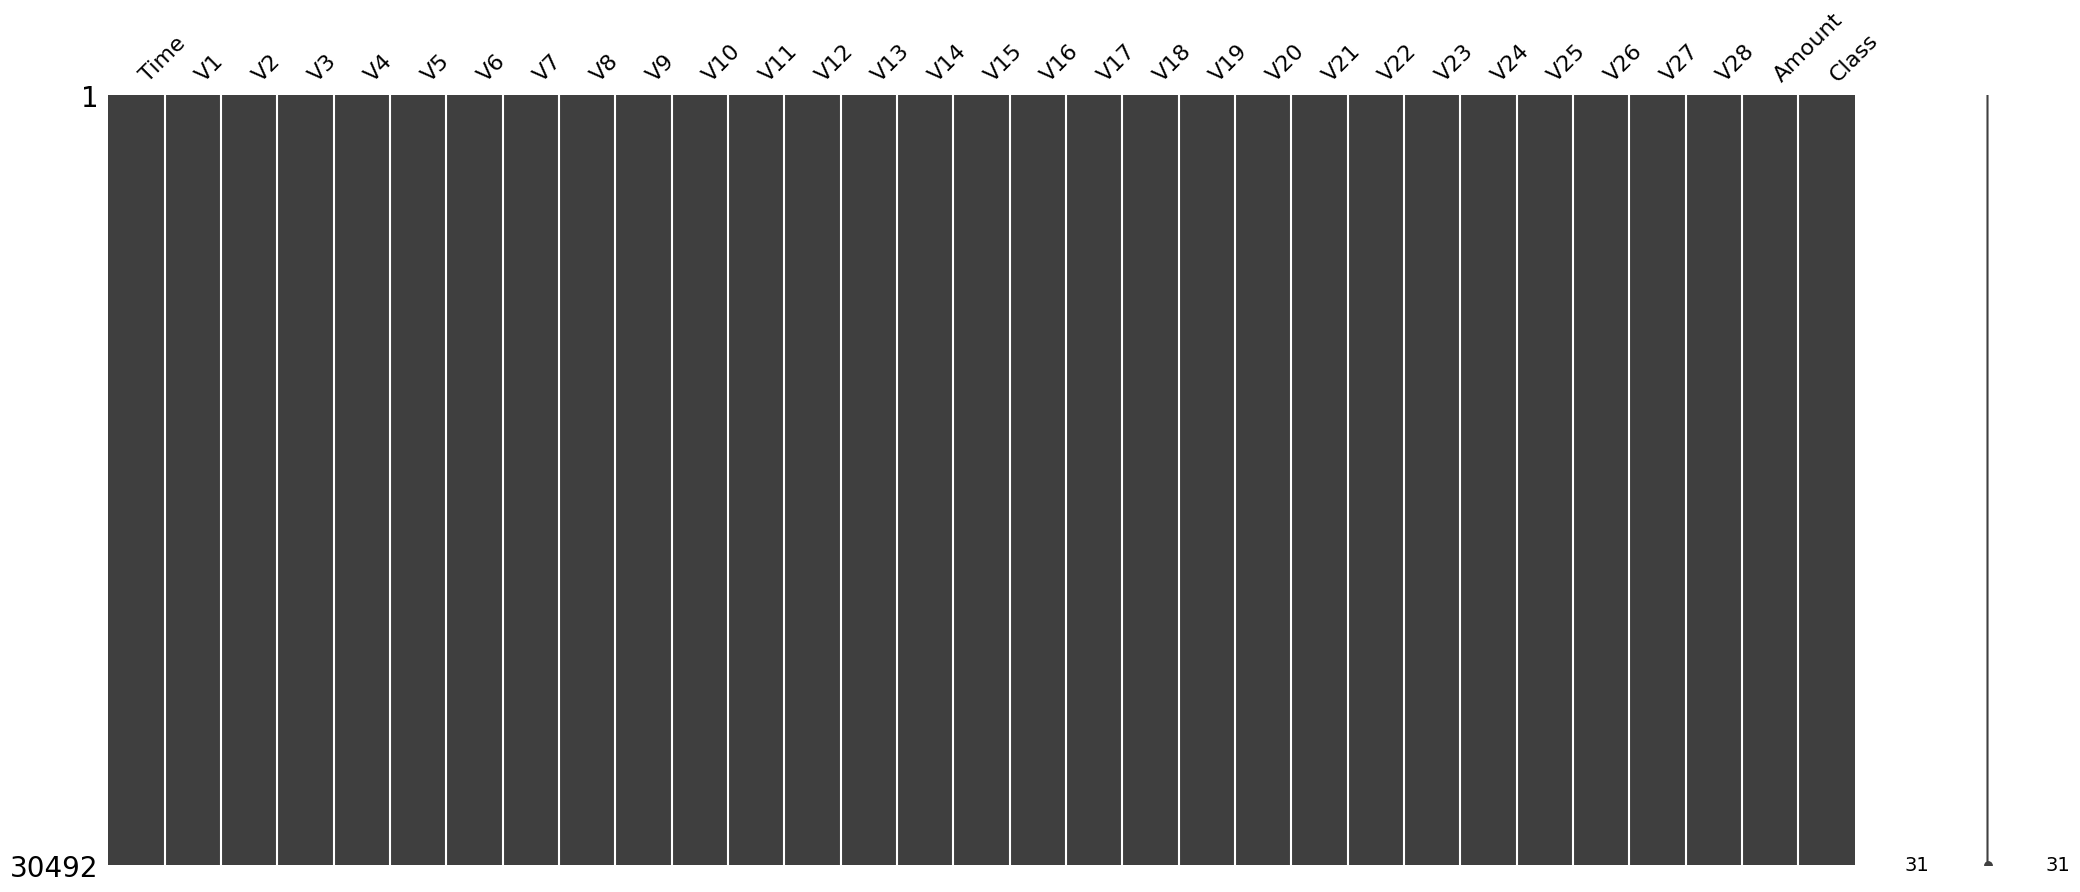

In [3]:
msno.matrix(data)

## **SPLITTING**

In [4]:
X = data.drop(columns="Class")
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24393, 30), (6099, 30), (24393,), (6099,))

## **PIPELINE , HYPERPARAMETER DAN TRAINING**

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24393 entries, 12387 to 23654
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24393 non-null  float64
 1   V1      24393 non-null  float64
 2   V2      24393 non-null  float64
 3   V3      24393 non-null  float64
 4   V4      24393 non-null  float64
 5   V5      24393 non-null  float64
 6   V6      24393 non-null  float64
 7   V7      24393 non-null  float64
 8   V8      24393 non-null  float64
 9   V9      24393 non-null  float64
 10  V10     24393 non-null  float64
 11  V11     24393 non-null  float64
 12  V12     24393 non-null  float64
 13  V13     24393 non-null  float64
 14  V14     24393 non-null  float64
 15  V15     24393 non-null  float64
 16  V16     24393 non-null  float64
 17  V17     24393 non-null  float64
 18  V18     24393 non-null  float64
 19  V19     24393 non-null  float64
 20  V20     24393 non-null  float64
 21  V21     24393 non-null  float64
 22 

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), X_train.columns.tolist()),
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('algo', SVC(max_iter=500))
])

parameter_grid = {
    'algo__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'algo__C': [0.1, 1, 10, 100, 1000],
}

In [7]:
model = GridSearchCV(pipeline, param_grid=parameter_grid, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Time',
                                                                          'V1',
                                                                          'V2',
                                                                          'V3',
                                                                          'V4',
                                                                          'V5',
                                                                          'V6',
                                                                          'V7',
                                                                          'V8',
                                                                          'V9',
                                                                          'V10',
                                                                          'V11',
                                                                          'V12',
                                                                          'V13',
                                                                          'V14',
                                                                          'V15',
                                                                          'V16',
                                                                          'V17',
                                                                          'V18',
                                                                          'V19',
                                                                          'V20',
                                                                          'V21',
                                                                          'V22',
                                                                          'V23',
                                                                          'V24',
                                                                          'V25',
                                                                          'V26',
                                                                          'V27',
                                                                          'V28',
                                                                          'Amount'])])),
                                       ('algo', SVC(max_iter=500))]),
             n_jobs=-1,
             param_grid={'algo__C': [0.1, 1, 10, 100, 1000],
                         'algo__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]},
             verbose=1)

## **EVALUASI MODEL**

In [10]:
from sklearn.metrics import accuracy_score, f1_score

# Memprediksi hasil pada data pelatihan (train)
y_train_pred = model.predict(X_train)

# Memprediksi hasil pada data pengujian (test)
y_test_pred = model.predict(X_test)

# Menghitung akurasi dan F1-score pada data pelatihan dan pengujian
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Menampilkan parameter terbaik dari GridSearchCV
print("Best Parameters found by GridSearchCV:")
print(model.best_params_)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Model:")
print(f"Akurasi pada data training: {train_accuracy}")
print(f"Akurasi pada data testing: {test_accuracy}")
print(f"F1 Score pada data training: {train_f1}")
print(f"F1 Score pada data testing: {test_f1}")

Best Parameters found by GridSearchCV:
{'algo__C': 10, 'algo__gamma': 0.01}

Hasil Evaluasi Model:
Akurasi pada data training: 0.9995490509572418
Akurasi pada data testing: 0.9985243482538121
F1 Score pada data training: 0.9995464949313696
F1 Score pada data testing: 0.9984971591077377



Confusion Matrix for Training Data:

Confusion Matrix for Testing Data:


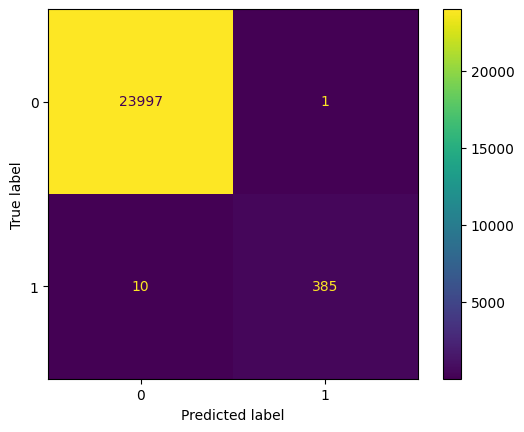

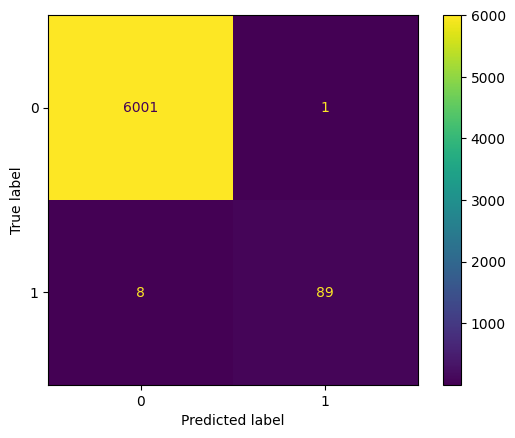

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix untuk data pelatihan
print("\nConfusion Matrix for Training Data:")
cm_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

# Confusion Matrix untuk data pengujian
print("\nConfusion Matrix for Testing Data:")
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

## **SAVE MODEL**

In [18]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai 'model.pkl'")

Model berhasil disimpan sebagai 'model.pkl'
